('panss_n1', [108])
('panss_n3', [584])
[[5.13020833 4.04166667 3.99479167 3.70833333 2.99479167 4.96875
  3.94270833 2.22916667 2.16666667 2.625      2.35416667 2.07291667
  2.09895833 1.83854167]
 [2.112      2.576      1.584      1.4        1.344      2.032
  1.808      4.4        4.432      4.264      4.484      4.04
  4.204      3.292     ]
 [2.64533333 2.37066667 1.81333333 1.63466667 1.43733333 2.592
  1.74933333 2.09066667 2.09866667 2.224      2.16       2.04533333
  1.952      1.704     ]
 [5.83333333 5.07142857 5.03571429 4.69047619 3.63095238 5.97619048
  4.94047619 4.88095238 4.97619048 5.5952381  5.5        4.89285714
  5.72619048 3.67857143]]


Counter({0: 192, 1: 250, 2: 375, 3: 84})

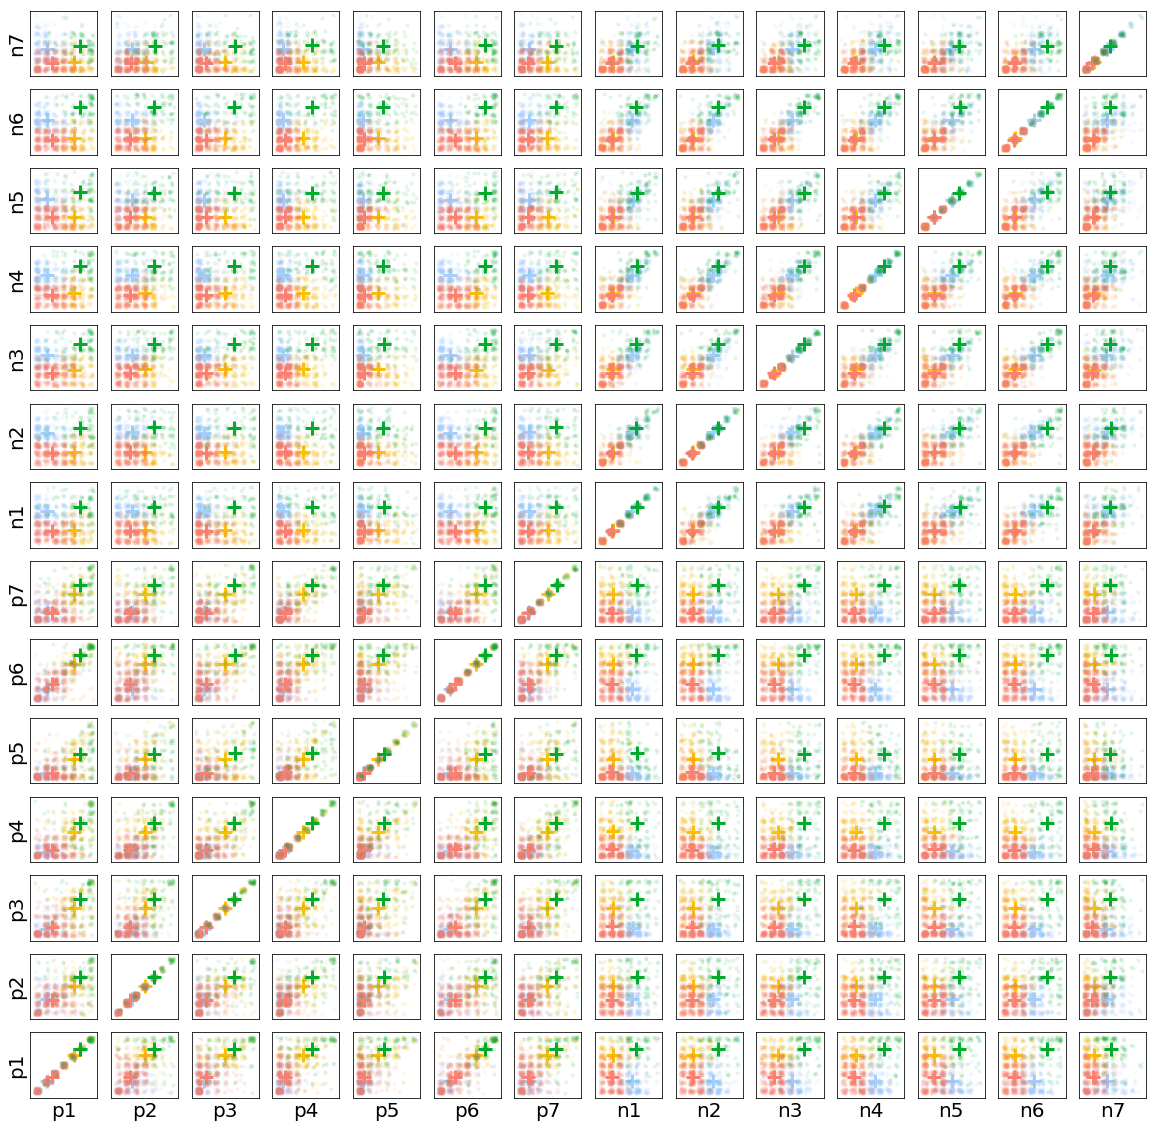

In [37]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

panss_p_n = pd.read_csv('panss_p_n.csv')

#数据全部转换为float64
panss_p_n = panss_p_n.astype('float64')

#定位缺失值
for columname in panss_p_n.columns:
    if panss_p_n[columname].count() != len(panss_p_n):
        loc = panss_p_n[columname][panss_p_n[columname].isnull().values==True].index.tolist()
        print(columname, loc)

#以中位数替换缺失值
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy = 'median', axis=0)
imp.fit(panss_p_n)
Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)
panss_p_n_imputed = imp.transform(panss_p_n)


#标准化数据进行后续操作
panss_p_n_imputed_mean = np.mean(panss_p_n_imputed, axis=0)
panss_p_n_imputed_std = np.std(panss_p_n_imputed, axis=0)
panss_p_n_imputed_standardized = preprocessing.scale(panss_p_n_imputed)


#进行KMean
from sklearn import cluster, metrics

kmeans_fit = cluster.KMeans(n_clusters = 4).fit(panss_p_n_imputed_standardized)
cluster_labels = kmeans_fit.labels_
cluster_centers = kmeans_fit.cluster_centers_

cluster_centers_not_imputed=cluster_centers * panss_p_n_imputed_std+panss_p_n_imputed_mean

print cluster_centers_not_imputed

panss_p_n_imputed_with_label = pd.DataFrame(panss_p_n_imputed, columns=panss_p_n.columns)
panss_p_n_imputed_with_label['label'] = cluster_labels

colors = ['#fac205','#a2cffe','salmon','#02ab2e']

fig = plt.figure()

fig.set_size_inches(20,20)

n=14

for i in range(n):
    for j in range(n):
        ax = plt.subplot(n,n,i*n+j+1)
        for k in range(4):
            sns.regplot(x=panss_p_n.columns[j], y=panss_p_n.columns[n-1-i], 
                        data=panss_p_n_imputed_with_label[panss_p_n_imputed_with_label['label']==k], 
                        fit_reg=False, x_jitter = 0.3, y_jitter=0.3, marker='o', color=colors[k], 
                        scatter_kws={'s':10, 'alpha':0.08})
            plt.scatter(cluster_centers_not_imputed[k,j],cluster_centers_not_imputed[k,n-1-i],color=colors[k], marker='+', s=200,linewidth=3)
        if not i ==n-1:
        	ax.set_xlabel('')
        else:
        	ax.set_xlabel(panss_p_n.columns[j][-2:], fontsize=20)
        if not j==0:
        	ax.set_ylabel('')
        else:
        	ax.set_ylabel(panss_p_n.columns[n-1-i][-2:], fontsize=20)
        ax.set_xticks([])
        ax.set_yticks([])

fig.savefig("panss_p_n_kmeans.png", dpi=300)

from collections import Counter
Counter(cluster_labels)

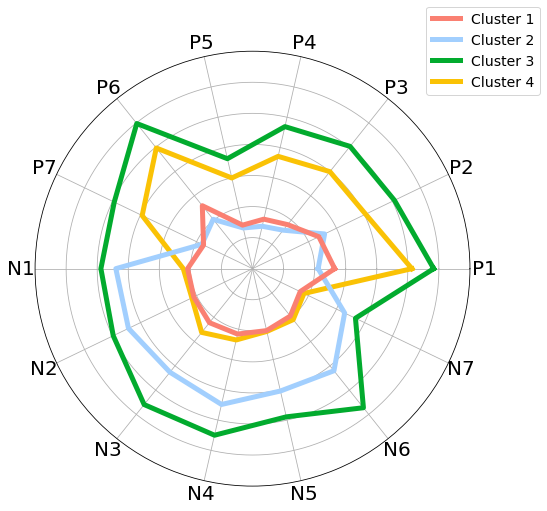

In [44]:
from math import pi

cluster_1 = cluster_centers_not_imputed[0].tolist()
cluster_2 = cluster_centers_not_imputed[1].tolist()
cluster_3 = cluster_centers_not_imputed[2].tolist()
cluster_4 = cluster_centers_not_imputed[3].tolist()

cluster_1 += cluster_1[:1]
cluster_2 += cluster_2[:1]
cluster_3 += cluster_3[:1]
cluster_4 += cluster_4[:1]

N=14

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(10,8))
ax1=plt.subplot(111, polar=True)
ax1.set_rlabel_position(0)
line_1 = ax1.plot(angles, cluster_1, linewidth=5, color='#fac205')
line_2 = ax1.plot(angles, cluster_2, linewidth=5, color='#a2cffe')
line_3 = ax1.plot(angles, cluster_3, linewidth=5, color='salmon')
line_4 = ax1.plot(angles, cluster_4, linewidth=5, color='#02ab2e')
plt.xticks(angles[:-1], ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 
                         'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7'], color='black', size=20)
plt.legend((line_3[0],line_2[0],line_4[0], line_1[0]),
           ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'), loc=(0.9,0.9), fontsize=14)
plt.yticks([1,2,3,4,5,6], ['','','','','',''], color="grey", size=13)

plt.ylim(0,7)

plt.savefig('panss_p_n_kmeans_radar_chart.png',dpi=300)

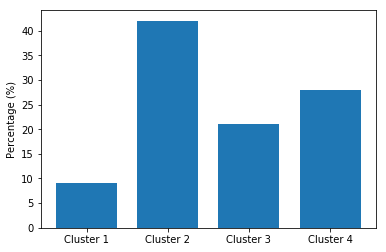

In [54]:
plt.bar([1,3,5,7],[9,42,21,28], width=1.5)
plt.xticks([1,3,5,7],['Cluster 1','Cluster 2','Cluster 3', 'Cluster 4'])
plt.ylabel('Percentage (%)')
plt.savefig('panss_p_n_kmeans_percentage.png',dpi=300)